# **Polynomial Regression with SciKit-Learn**

**Polynomial Regression with SciKit-Learn** is a project aimed at exploring the power of polynomial regression for modeling non-linear relationships in data. Using the popular Python library, SciKit-Learn, this project demonstrates how to apply polynomial features to linear regression models, allowing for the capture of more complex patterns and trends. It's very popular for analyzing stock prices, predicting trends, and even working with datasets that exhibit curvature. This project provides a practical approach to it where we aim to enhance the performance of regression model through polynomial transformations.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This dataset, sourced from ISLR, illustrates the relationship between a product's sales figures (measured in thousands of units) and the corresponding advertising expenditure (in thousands of dollars) across three media channels: TV, radio, and newspaper.

In [ ]:
df = pd.read_csv(r"I:\Python\Projects\Polynomial Regression & Regularization Methods (Ridge and LASSO)\Advertising.csv")

In [ ]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
# Everything BUT the sales column
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

## SciKit Learn

---

## Polynomial Regression

**We'll use PolynomialFeatures from sklearn's preprocessing module to transform our original dataset by adding polynomial terms.**

Starting from a basic linear regression with a single feature:

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

we can expand this by generating polynomial terms up to a specified degree *d*:

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

These added polynomial terms become new features, allowing us to fit a linear regression model on a more complex feature space. It’s important to carefully choose the value of *d*, the polynomial degree. We'll rely on evaluation metrics from the test set to make the best choice!

**Keep in mind, our dataset has multiple input features—not just one—so PolynomialFeatures will also generate interaction terms. For instance, if we have two features [a, b], a degree-2 transformation results in: [1, a, b, a^2, ab, b^2].**

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [13]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [14]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Model Designed for Polynomial Regression

#### Initialize the model instance with desired configuration

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(fit_intercept=True)

### Fit/Train the Model using the training dataset

**Ensure you fit the model only to the training data to properly assess its performance on unseen data**

In [20]:
model.fit(X_train,y_train)

LinearRegression()


-----

## Evaluation on the Test Set

### Evaluating Model Performance on the Test Set

To ensure a fair evaluation of our model, we assess its performance using metrics derived from the test set, which consists of data the model has never encountered during training.

In [21]:
test_predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [24]:
MAE

0.4896798044803838

In [25]:
MSE

0.4417505510403753

In [26]:
RMSE

0.6646431757269274

In [27]:
df['sales'].mean()

14.0225

### Comparison with Simple Linear Regression

**Performance on the Test Set (Note: Ensure the same Random Split for a fair comparison!)**

* **Simple Linear Regression:**
    * MAE: 1.213
    * RMSE: 1.516

* **Polynomial Regression (Degree 2):**
    * MAE: 0.4896
    * RMSE: 0.664


---
---
## Choosing a Model

### Adjusting Model Parameters

Are we happy with the current model's performance? Maybe increasing the polynomial degree will improve it further! However, we must be cautious—how high is too high? It's time to reconsider our model and parameters. We can loop through different polynomial degrees, evaluate their performance, and visualize how the error changes. This process will also introduce the concept of Overfitting.

Let's use a for loop to accomplish the following:

1. Generate polynomial features of various orders
2. Split the polynomial data into train and test sets
3. Fit the model on the training data
4. Report the metrics for both training and testing sets
5. Plot the results and analyze the potential for overfitting


In [28]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):

    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later


    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

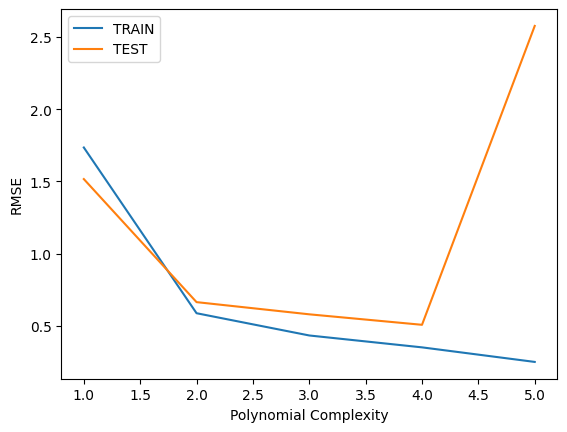

In [29]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

## Finalizing Model Choice

Now that we've evaluated different polynomial degrees, there are two key components we need to save: the Polynomial Feature creator and the model itself. Here’s how we can proceed:

1. **Choose final parameters** based on the performance metrics from the test set.
2. **Retrain the model** on the entire dataset using the selected parameters.
3. **Save the Polynomial Feature converter** (to ensure consistent feature transformation for future predictions).
4. **Save the trained model** (so we can use it for making future predictions without retraining).


In [30]:
# Based on our chart, could have also been degree=4, but
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Saving Model and Converter

In [33]:
from joblib import dump, load

In [34]:
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [35]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

Remember that any incoming data must be **converted** to polynomial features, as our model has been trained on such transformed data. We’ll load the saved Polynomial Feature converter and use the **.transform()** method on the new data, without needing to refit the model.

For instance, if our next ad campaign involves a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, we can predict the expected sales units by applying the following steps:

1. Convert the new input data to polynomial features using the saved converter.
2. Use the trained model to make predictions on the transformed data.

Now, let's calculate the expected sales based on the given ad spend:
- TV Ads: 149k
- Radio Ads: 22k
- Newspaper Ads: 12k

**How many units could we expect to sell as a result of this?**

In [36]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [37]:
campaign = [[149,22,12]]

In [38]:
campaign_poly = loaded_poly.transform(campaign)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [39]:
campaign_poly

array([[1.4900e+02, 2.2000e+01, 1.2000e+01, 2.2201e+04, 3.2780e+03,
        1.7880e+03, 4.8400e+02, 2.6400e+02, 1.4400e+02]])

In [40]:
final_model.predict(campaign_poly)

array([14.51114516])

-----
---